# Deep Learning
[NN-SVG](https://alexlenail.me/NN-SVG/)

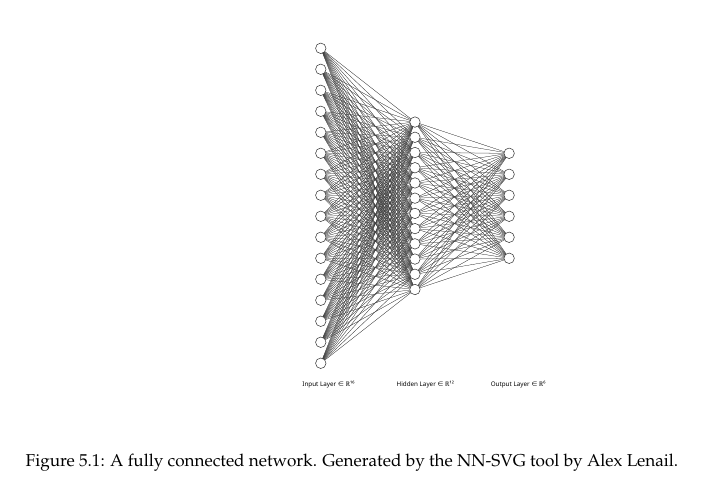

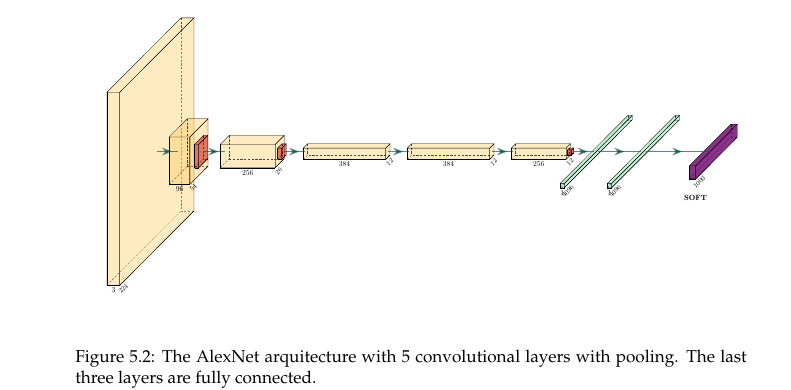

# CNN: convolutional neural networks

Tambien se concen como ConvNets. Se componen de bloques donde se usa convolucion, pooling (se define mas adelante), fully conected (densas) y clasificacion. 

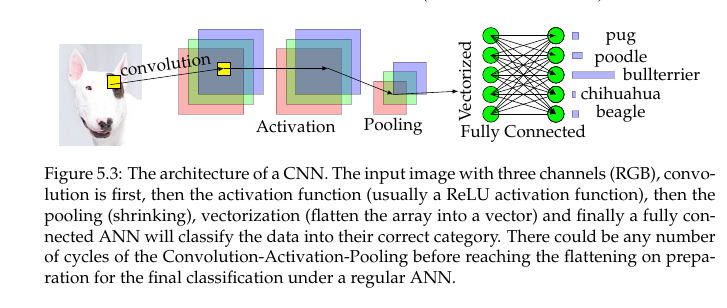

### Capa convolucional
Cual es la idea de convoucion. La idea es extraer patrones.
Por ejemmplo: Si quisieramos extraer patrones verticales podemos usar el filtro:

$$ \begin{pmatrix} 0 & 1 & 0 \\ 0 &1 & 0  \\ 0 & 1 & 0 \end{pmatrix} $$

Para patrones horizontales los "filtros" son de la forma

$$\begin{pmatrix} 0 & 0& 0 \\ 1 & 1 & 1 \\ 0 & 0 & 0 \end{pmatrix} $$
Un filtro obliquo seria la matriz identidad.


$$\begin{pmatrix} 1 & 0& 0 \\ 0 & 1 & 0 \\ 0 & 0 & 1 \end{pmatrix} $$

Extraer un objeto en forma de cuadrado

$$\begin{pmatrix} 1 & 1& 1 \\ 1 & 0 & 1 \\ 1 & 1 & 1 \end{pmatrix} $$

[convolutional deep belief networks](https://web.eecs.umich.edu/~honglak/icml09-ConvolutionalDeepBeliefNetworks.pdf)


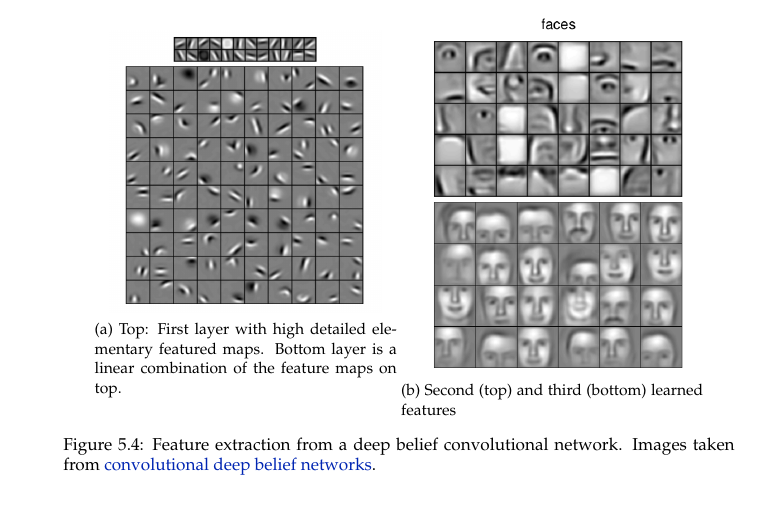

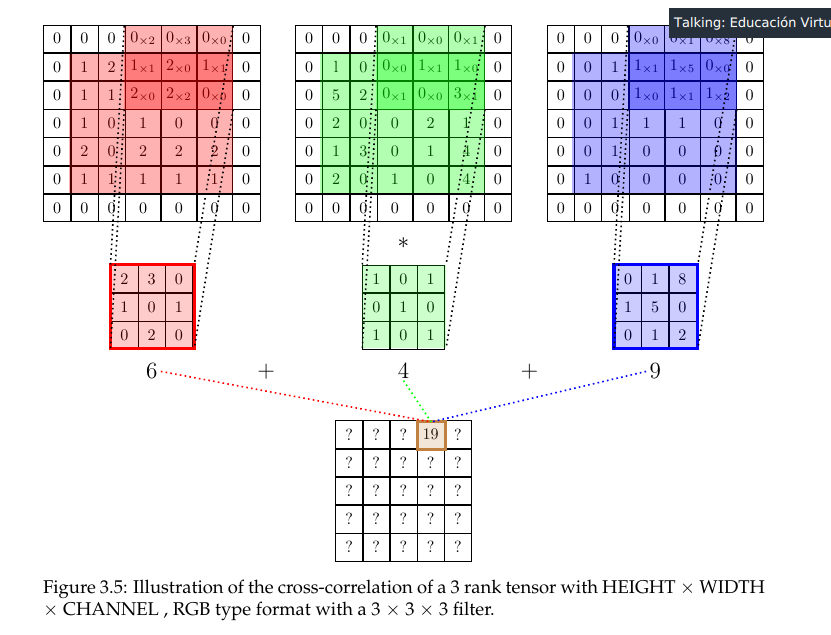

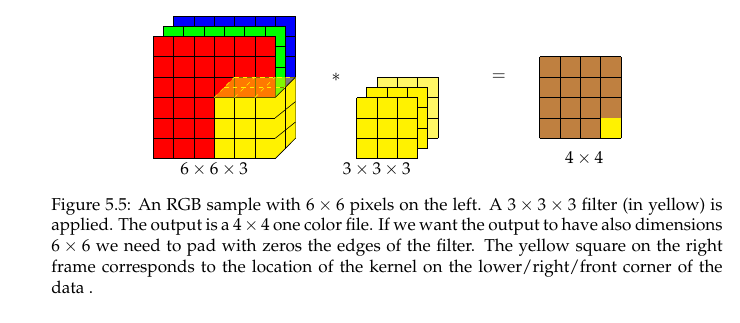

#### Conteo de parametros en redes convolucionales,
lo que contamos son "training parameters" (parametros de entrenamiento). La capa entrada no tiene parametros de entrenamiento. (los $\theta$s)

Asumamos que la primera capa tiene
dimensiones
$$ ancho \times alto \times profundo$$.
Queremos aplicar un filtro de dimensiones
$$ cancho \times calto \times cprofundo$$

El tamano del set de parametros es

$$ \#params = (cancho \times calto \times cprofundo +1) \times filtros  $$
los filtros ($\# filtros$)  son la profundidad de la salida. 

Ejemplo: Asuma que tenemos una imagen de $24 \times 24$ pixeles y 3 canales (RGB).
Queremos aplicar un fuiltro de $3 \times 3$ con salida de 15 filtros (son la nueva profundidad). Tenemos:

\begin{eqnarray}
cancho = 3 \\
calto = 3 \\
cprofundo=3 \\
filtros=15 \\
\# params = (3 \times 3 \times 3 + 1) \times 15 = 420
\end{eqnarray}


Agregamos una nueva capa convolucional de 20 filtros de tamano $3 \times 3$. Tenemos ahora:

\begin{eqnarray}
cancho = 3 \\
calto = 3 \\
cprofundo=15 \\
filtros=20 \\
\# params = (3 \times 3 \times 15 + 1) \times 20 = 2720
\end{eqnarray}

Finalmente agregamos una capa mas, de 5 filtrso tamano $3 \times 3$

$$ \# parametros = (3 \times 3 \times 20+1) \times 5 = 905 $$





*italicized text*# New Section

In [10]:
# imoprt keras libraries
from keras import layers
from keras import models

model = models.Sequential()

# definimos una capa convolucional de tamano (3,3)
# 3 canales 24 x 24 pixeles y 15 filtros
model.add(layers.Conv2D(15, (3,3), input_shape=(24,24,3)))
model.add(layers.Conv2D(20, (3,3)))
model.add(layers.Conv2D(5, (3,3)))


model.summary()


Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_7 (Conv2D)           (None, 22, 22, 15)        420       
                                                                 
 conv2d_8 (Conv2D)           (None, 20, 20, 20)        2720      
                                                                 
 conv2d_9 (Conv2D)           (None, 18, 18, 5)         905       
                                                                 
Total params: 4,045
Trainable params: 4,045
Non-trainable params: 0
_________________________________________________________________


Observe la formula de parametros de salida de convolucion

$$ \#(z_j) = \frac{N_y - N_x + 2p }{s}  + 1 $$

Aplicada a los parametros de arriba produce
\begin{eqnarray}
\frac{24-3}{1}+1 = 22  \\
\frac{22-3}{1}+1 = 20  \\
\frac{20-3}{1}+1 = 18  \\
\end{eqnarray}

## La capa de activacion

Simplemente como se hizo en MLP (Multilayer perceptron, clasicas ANN) se utilizan funciones de activacion para "suprimir" la linealidad.

Keras tiene una buena coleccion de funciones de activacion (en clase vimos algunas: logistic, softmax, ReLU, leaky ReLU, etc)

[funciones de activacion en Keras](https://keras.io/api/layers/activations/)

## Pooling Layer
Tiene los siguientes propositos:
* Reducir el tamano de la red
* Reducir la posibilidad de overfitting
* Extraer "features" (propiedades) espeficias del modelo (promedio, maximo, etc.)

El tamano despues de pooling es:

$$ tamano despues de pooling = \left [ \frac{n_x - k_x + p_x)}{s_x} + 1  \right ]  \times \left [ \frac{n_y - k_y + p_y)}{s_y} + 1  \right ]$$. Si $s_x>1$, $s_y>1$ se reduce el tamano de la salida or una scala $s_x \times s_y$. $n_x-k_x$ es una reduccion frente a $n_x$ y lo mismo $n_y - k_y$ es una reduccion frente a $n_y$.

Hay dos tecnicas de pooling

* MaxPooling: Extraer el maximo
Veamos esto con un ejemplo. 





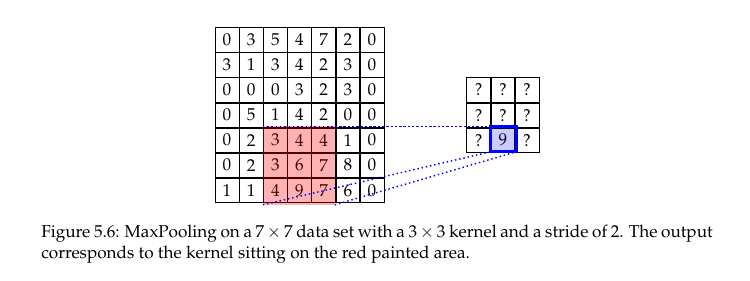

* AveragePooling (promedio)
Extrae el promedio de los datos sombreados por el filtro.



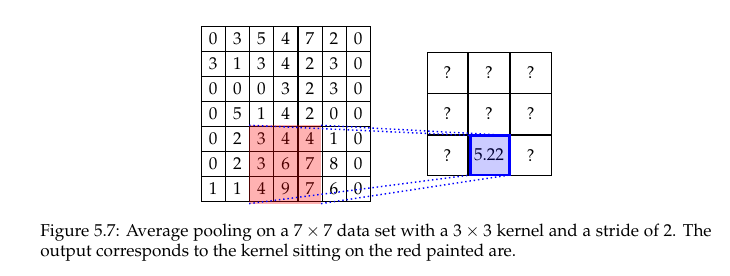

## Capas densas (fully connected layers)

Un punto importante es que las capas totalmente conectadas tiene muchos parametros (por que son todos con todos). El numero de parametros de las capas totalmente conectadas
es 

$$\# \text{parametros de entrenamiento} = (n_i + 1) \times n_0 $$

Despues estas capas viene la diecion que es una activacion por ejemplo softmax. 

[un ejemplo de CNN con 15 capas  y 10 clases del Cifer-10](http://cs231n.stanford.edu/)

## Campo receptivo (receptive field)

Construyamos un ejemplo: Tenemos unos dastos entradas y un filtro: $3 \times 3$ 

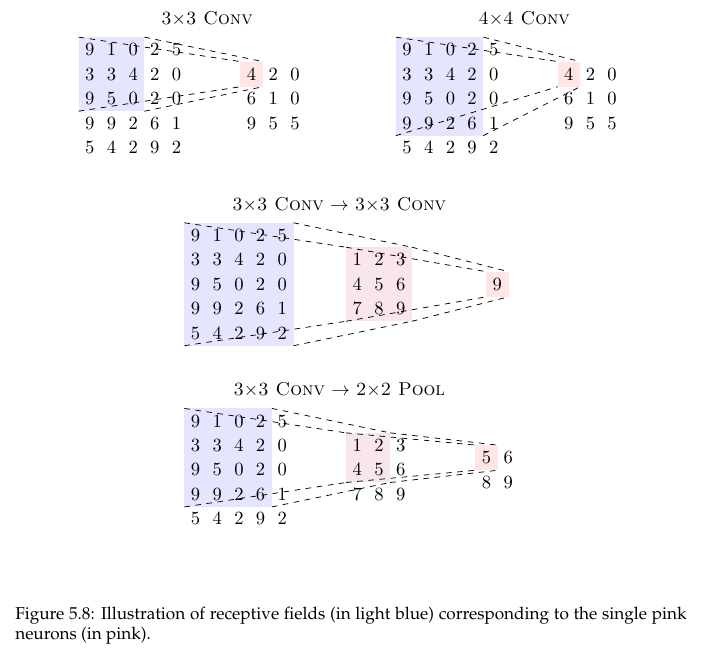


El campo visual consite en todas las neuronas de entrada que
activan una sola neurona de salida. 

Vamos a matematizar este concepto.

Pensemos en $s_x=s_y=1$, $p_x=p_y=0$.
\begin{eqnarray}
\text{input:} &\quad& x \\
\text{capa 1: } &\quad& x-k + 1 \\
\text{capa 2: } &\quad& x-k+1 -k + 1 = x - 2k + 2 \\
\text{capa $n$: } & \quad & x - nk + n
\end{eqnarray}

La longitud del campo visual se obtiene sabiendo que al final toda esta "energia" se concentra en una sola neurona.

$x-nk + n = 1$, de donde
$x = nk -n +1 = n(k-1) + 1$. 
$n$ es el numero de capas que lo recorren, $k$ es el tamano del filtro ($k \times k$)

Verfifiquemos con los ejemplos de arriba:
* $n=1,k=3$, $x=1(3-1)+1= 3$
* $n=1, k=4$, $x=1(4-1)+1= 4$
* $n=2, k=5$, $x=2(3-1)+1 = 5 $

Tarea: Encontrar la formula de campo visual (receptvie field) cuando hay pooling.

Hay un buen tutorial de campo visual en:

[Campo receptivo "theaisummer.com"](https://theaisummer.com/receptive-field/)



## **Regularizacion**

Recuerde de ML (class). Si queremos resolver $Ax=b$ y $A$ es "ill conditioned"
podemos hacer Tikhonov regularization. Resolver, en vez

$$ (A^T A x + \lambda I) x = A^T b$$
con $\lambda > 0$. 

Un problema que ML presenta es el "overfitting" sobre ajuste.

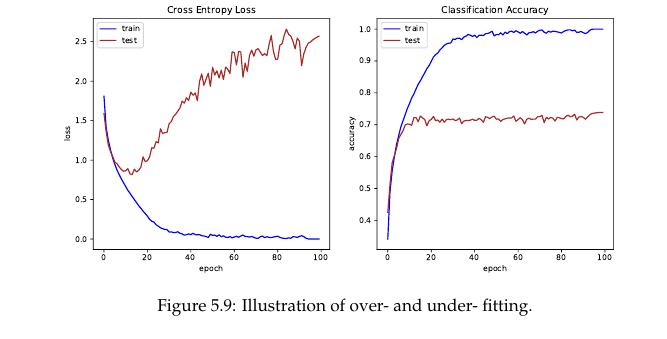

Formas de evitar el overfitting:

* Incremento de datos. Ya vimos en el capitulo anterior muchas formas de obtner datos. Ademas de poder obtener dastos nuevos podemos hacer "data augmentation". Es decir con los pocos datos que tengamos pordemos hacer escalamiento (como un zoom in o out),
shifting (correr los datos a derecha/izquierda/arriba/abajo).
Rotar un angulo. Etc.

* reducir parametros. No mucho por que se pasa para el otro lado. Underfitiing. Polinomios que no sea lineal pero tampoco de un grado muy alto. 
* Regularizacion: 
$$J_1(\theta) = C(\theta) + \lambda \| \theta \|^2 $$
$$J_2(\theta) = C(\theta) + \lambda \| \theta \|_1 $$

* early stopping. En el ejemplo de arriba paramos en 5 epocas. 

* Dropout: Creado por Geoffrey E. Hinton y su grupo en la universidad de Toronto. 




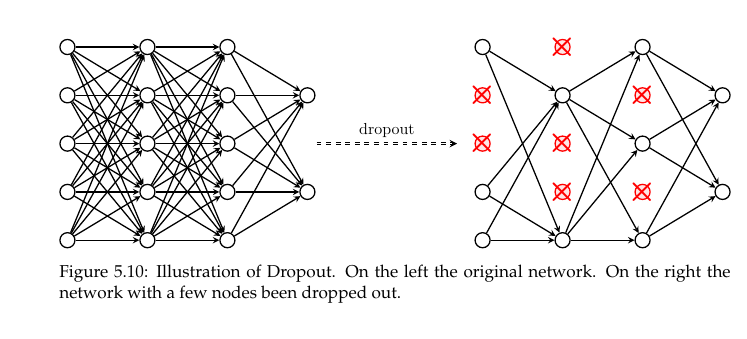

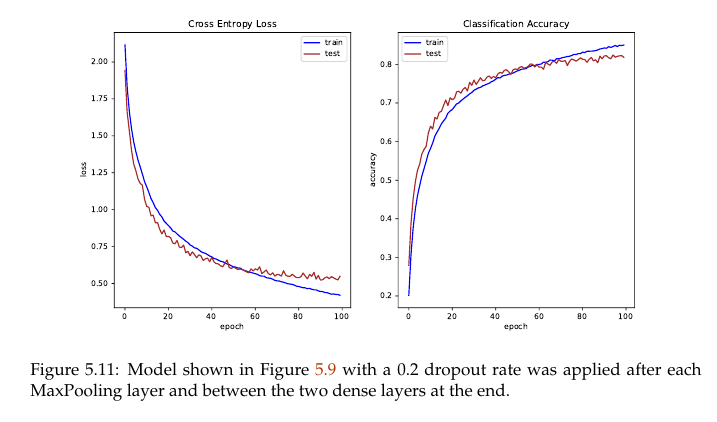

* Batch Normalizacion: Normaliza los pesos en cada capa (restar la media y dividir por la varianza). Ayuda en el vanishing and exploding gradient y ayuda en el "overfitting".
